In [130]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import math
from collections import Counter

%matplotlib inline

plt.style.use("ggplot")

In [131]:
connection = psycopg2.connect(dbname='geocenterdev',
                              user='jrkaspar', 
                              host='cslvm74.csc.calpoly.edu', 
                              password='Jrk1jrk2jrk3')

cur = connection.cursor()
 
query = """
SELECT t.* FROM public.element t      
     
     """
cur.execute(query)
queried_data = cur.fetchall()

In [132]:
elements = pd.DataFrame(queried_data, columns = ["osmId", "time", "changesetId",'type','author'])

In [133]:
elements.head()

,osmId,time,changesetId,type,author
0,278985288,2008-10-14 14:30:51,332098,node,utilisateur anonyme
1,278983349,2008-10-14 14:30:55,332098,node,utilisateur anonyme
2,278978551,2008-10-14 14:31:01,332098,node,utilisateur anonyme
3,249212050,2008-10-14 14:31:13,332098,node,utilisateur anonyme
4,249212056,2008-10-14 14:31:15,332098,node,utilisateur anonyme


In [134]:
elements['time'] = pd.to_datetime(elements['time'])
elements = elements.set_index('time')
elements['day'] = elements.index.date
elements['hour'] = elements.index.hour

In [135]:
elements = elements.set_index('osmId')

In [136]:
counts = elements.groupby(['day']).agg(len)

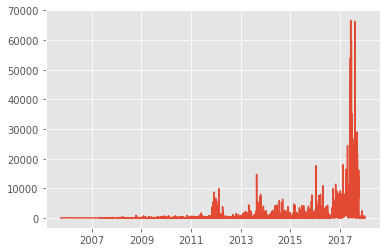

In [137]:
plt.plot(counts.index,counts.type)

Text(0.5,1,'Edits per Day After 2015')

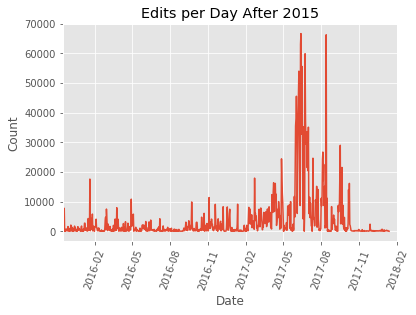

In [144]:
plt.plot(counts.index,counts.type)
plt.xlabel('Date')
plt.ylabel('Count')
plt.xlim(pd.Timestamp('2015-11-15'), pd.Timestamp('2018-02-01'))
plt.xticks(rotation = 70)
plt.title('Edits per Day After 2015')

In [139]:
counts2 = elements.groupby(['hour']).agg(len)

Text(0.5,1,'Edits Per Hour')

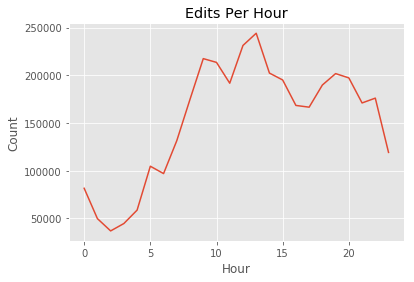

In [140]:
plt.plot(counts2.index,counts2.type)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Edits Per Hour')

In [141]:
elements['type'].value_counts()

node    3305139
way      360489
Name: type, dtype: int64

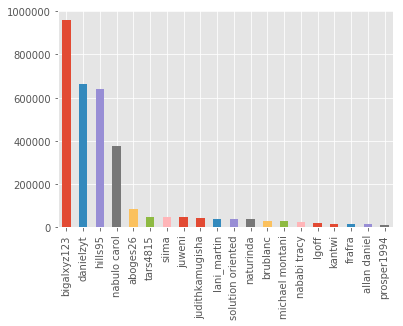

In [142]:
pd.value_counts(elements['author']).head(20).plot.bar()

(0.0, 50000)

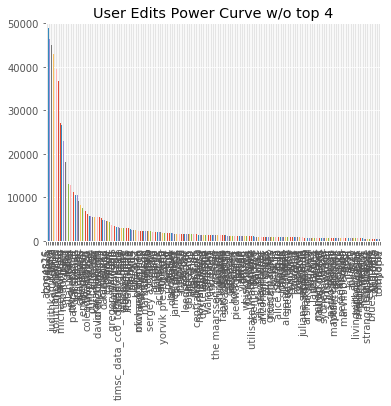

In [143]:
pd.value_counts(elements['author'])[4:200].plot.bar()
plt.title("User Edits Power Curve w/o top 4")
plt.ylim(ymax = 50000)